### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv("FicZon_Leads.csv")

In [3]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2022-01-01 00:00:00,102.0,Email Campaign,NaN,yes@domain.com,Charlie,NaN,Online,Low Potential
1,2022-01-01 01:00:00,NaN,Referral,No,lead@mail.com,Diana,New York,In-person,Low Potential
2,2022-01-01 02:00:00,104.0,NaN,Yes,info@site.org,NaN,NaN,Hybrid,High Potential
3,2022-01-01 03:00:00,103.0,Referral,Yes,yes@domain.com,NaN,San Francisco,In-person,Low Potential
4,2022-01-01 04:00:00,101.0,LinkedIn,Yes,info@site.org,Charlie,NaN,Hybrid,Low Potential


In [4]:
# Basic information
print("Data Shape:", data.shape)


Data Shape: (7422, 9)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7048 non-null   float64
 2   Source         5889 non-null   object 
 3   Mobile         6669 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    5954 non-null   object 
 6   Location       5964 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB
None


In [6]:
# Display first few rows
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2022-01-01 00:00:00,102.0,Email Campaign,NaN,yes@domain.com,Charlie,NaN,Online,Low Potential
1,2022-01-01 01:00:00,NaN,Referral,No,lead@mail.com,Diana,New York,In-person,Low Potential
2,2022-01-01 02:00:00,104.0,NaN,Yes,info@site.org,NaN,NaN,Hybrid,High Potential
3,2022-01-01 03:00:00,103.0,Referral,Yes,yes@domain.com,NaN,San Francisco,In-person,Low Potential
4,2022-01-01 04:00:00,101.0,LinkedIn,Yes,info@site.org,Charlie,NaN,Hybrid,Low Potential


In [7]:
data.shape

(7422, 9)

#### Dataset information
---> Above data has 9 features including target variable.

--->The name of features are unknown.

---> The target variable has two classes 0 and 1. Which suggests 0 = Low potential and 1 refers to High potentail.

In [8]:
# 3. Initial Data Exploration
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7048 non-null   float64
 2   Source         5889 non-null   object 
 3   Mobile         6669 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    5954 non-null   object 
 6   Location       5964 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB
None


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2022-01-01 00:00:00,102.0,Email Campaign,NaN,yes@domain.com,Charlie,NaN,Online,Low Potential
1,2022-01-01 01:00:00,NaN,Referral,No,lead@mail.com,Diana,New York,In-person,Low Potential
2,2022-01-01 02:00:00,104.0,NaN,Yes,info@site.org,NaN,NaN,Hybrid,High Potential
3,2022-01-01 03:00:00,103.0,Referral,Yes,yes@domain.com,NaN,San Francisco,In-person,Low Potential
4,2022-01-01 04:00:00,101.0,LinkedIn,Yes,info@site.org,Charlie,NaN,Hybrid,Low Potential


In [9]:
### Data Cleaning
# Check missing values
print(data.isnull().sum())

Created             0
Product_ID        374
Source           1533
Mobile            753
EMAIL               0
Sales_Agent      1468
Location         1458
Delivery_Mode       0
Status              0
dtype: int64


The data has null values

In [10]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [11]:
# Data Cleaning
# Fill missing values with suitable methods or placeholder
data['Product_ID'].fillna(method='ffill', inplace=True)
data['Source'].fillna('Unknown', inplace=True)
data['Mobile'].fillna('Unknown', inplace=True)
data['Sales_Agent'].fillna('Unknown', inplace=True)
data['Location'].fillna('Unknown', inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
# Check again
print(data.isnull().sum())

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64


### Encoding

In [14]:
# Label Encoding for Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [15]:
# Encode Target Variable
data['Status'] = le.fit_transform(data['Status'])

In [16]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2022-01-01 00:00:00,102.0,0,1,2,2,4,2,1
1,2022-01-01 01:00:00,102.0,2,0,1,3,2,1,1
2,2022-01-01 02:00:00,104.0,3,2,0,4,4,0,0
3,2022-01-01 03:00:00,103.0,2,2,2,4,3,1,1
4,2022-01-01 04:00:00,101.0,1,2,0,2,4,0,1


#### Target variable

In [17]:
data['Status'].dtypes

dtype('int32')

<Axes: ylabel='count'>

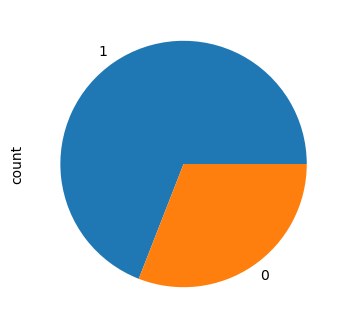

In [18]:
# Pie chart for target variable
data['Status'].value_counts().plot(kind='pie', figsize=(4,4))

In [19]:
from sklearn.utils import resample 
Status_0 = data[data.Status == 0]
Status_1 = data[data.Status == 1]

Status_0_downsampled = resample(Status_0, n_samples = len(Status_1), random_state = 13)

In [20]:
Status_0_downsampled.shape

(5127, 9)

In [21]:
Status_0.shape

(2295, 9)

In [22]:
# Concating downsampled class with target class 1
downsampled = pd.concat([Status_0_downsampled, Status_1])
downsampled.Status.value_counts()

Status
0    5127
1    5127
Name: count, dtype: int64

Now the target variable is balanced.

<Axes: ylabel='count'>

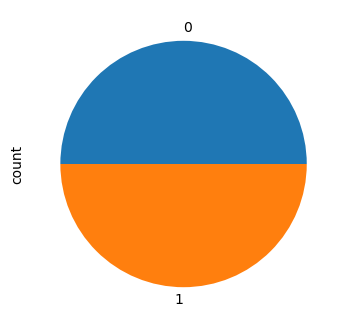

In [23]:
# Checking for target class balance
downsampled.Status.value_counts().plot(kind='pie', figsize=(4,4))

### Exploratory Data Analysis (EDA)

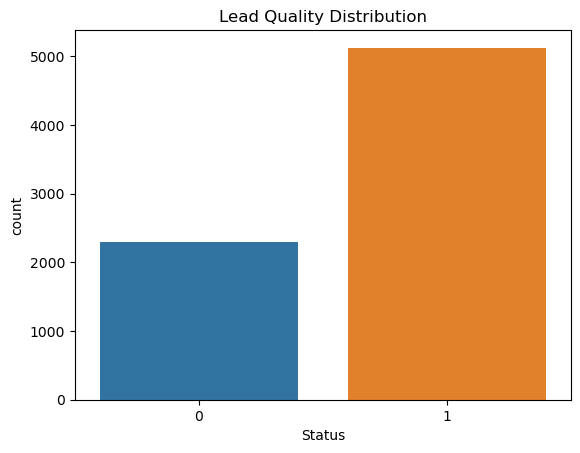

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
# Lead Status distribution
sns.countplot(x='Status', data=data)
plt.title("Lead Quality Distribution")
plt.show()

---> EDA using count plot the status is high poentential is lead quality distribution.

Source
3    1533
0    1511
2    1494
4    1470
1    1414
Name: count, dtype: int64


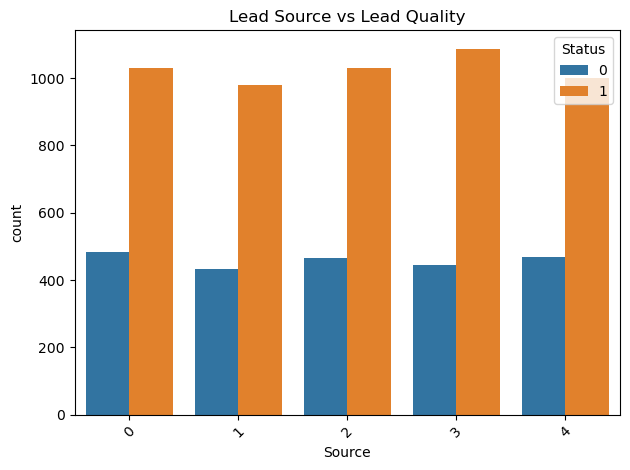

In [25]:
# Lead Source Distribution
print(data['Source'].value_counts())
sns.countplot(data=data, x='Source', hue='Status')
plt.xticks(rotation=45)
plt.title("Lead Source vs Lead Quality")
plt.tight_layout()
plt.show()

Sales_Agent
3    1516
1    1503
0    1470
4    1468
2    1465
Name: count, dtype: int64


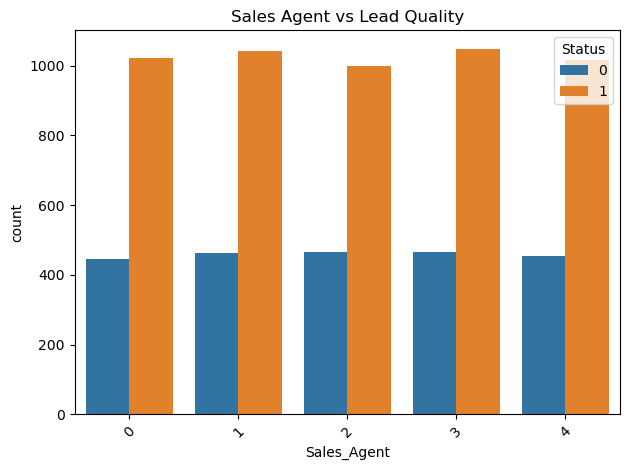

In [26]:
# Sales Agent Performance
print(data['Sales_Agent'].value_counts())
sns.countplot(data=data, x='Sales_Agent', hue='Status')
plt.xticks(rotation=45)
plt.title("Sales Agent vs Lead Quality")
plt.tight_layout()
plt.show()

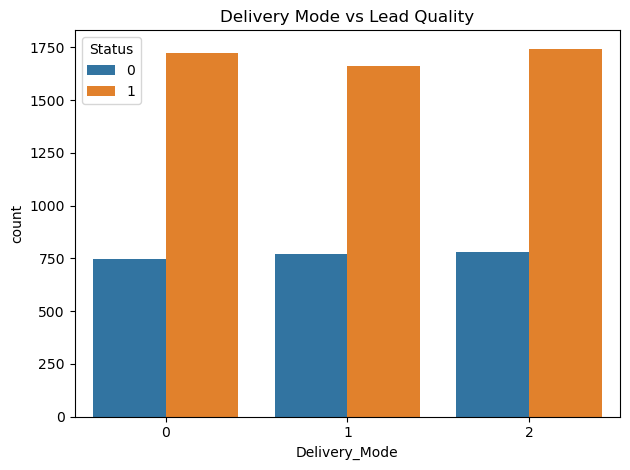

In [27]:
# Delivery Mode Distribution
sns.countplot(data=data, x='Delivery_Mode', hue='Status')
plt.title("Delivery Mode vs Lead Quality")
plt.tight_layout()
plt.show()

In [28]:
# Missing values filling
for col in ['Product_ID', 'Source', 'Mobile', 'Sales_Agent', 'Location']:
    data[col] = data[col].fillna('Unknown')

In [29]:
print(data.isnull().sum())

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64


#### Feature Engineering

In [30]:
# Feature Engineering: Extract Hour from Created date
data['Created'] = pd.to_datetime(data['Created'], errors='coerce')
data['Hour'] = data['Created'].dt.hour

In [31]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Hour
0,2022-01-01 00:00:00,102.0,0,1,2,2,4,2,1,0
1,2022-01-01 01:00:00,102.0,2,0,1,3,2,1,1,1
2,2022-01-01 02:00:00,104.0,3,2,0,4,4,0,0,2
3,2022-01-01 03:00:00,103.0,2,2,2,4,3,1,1,3
4,2022-01-01 04:00:00,101.0,1,2,0,2,4,0,1,4
...,...,...,...,...,...,...,...,...,...,...
7417,2022-11-06 01:00:00,101.0,4,2,1,2,3,1,1,1
7418,2022-11-06 02:00:00,101.0,0,2,0,3,1,1,1,2
7419,2022-11-06 03:00:00,104.0,4,2,1,1,4,2,1,3
7420,2022-11-06 04:00:00,101.0,0,1,2,2,2,2,1,4


In [32]:
# Select features and target
features = ['Product_ID', 'Source', 'Mobile', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Hour']
X = data[features]
y = data['Status']

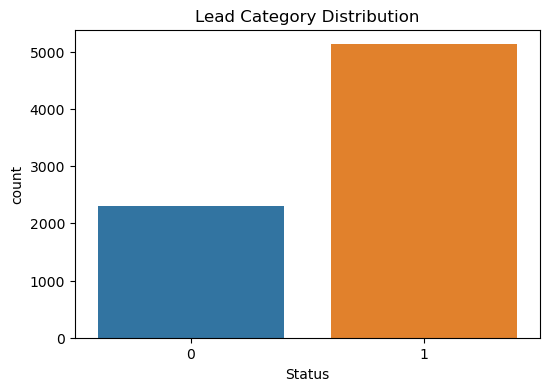

In [33]:
#  Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=data)
plt.title('Lead Category Distribution')
plt.show()

#### Checking for correlation

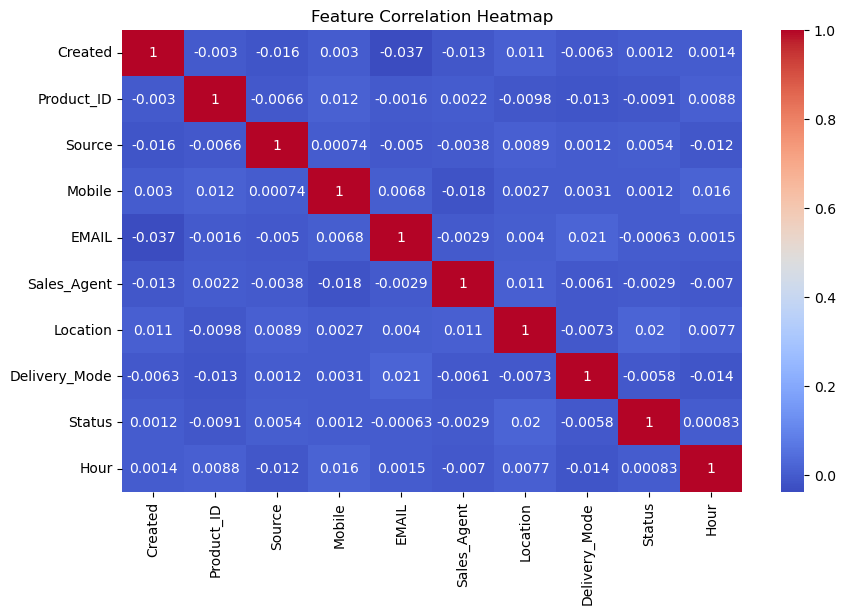

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


The above heatmap shows that there is no correlation among the features.

### Model selection

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### RandomForestClassifier

In [36]:
# Model training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.12      0.17       466
           1       0.68      0.86      0.76      1019

    accuracy                           0.63      1485
   macro avg       0.48      0.49      0.47      1485
weighted avg       0.56      0.63      0.58      1485



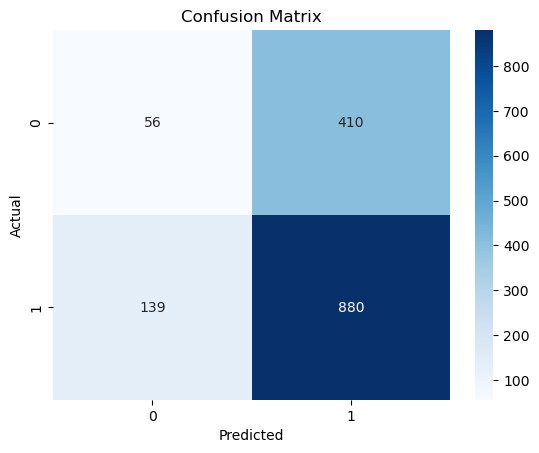

In [37]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### LogisticRegression

In [38]:
# Training the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = LR.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
# Testing Score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       466
           1       0.69      1.00      0.81      1019

    accuracy                           0.69      1485
   macro avg       0.34      0.50      0.41      1485
weighted avg       0.47      0.69      0.56      1485



In [41]:
# f1_score
f1_logistic = f1_score(y_test,y_pred,average='weighted')
f1_logistic

0.5584928088122977

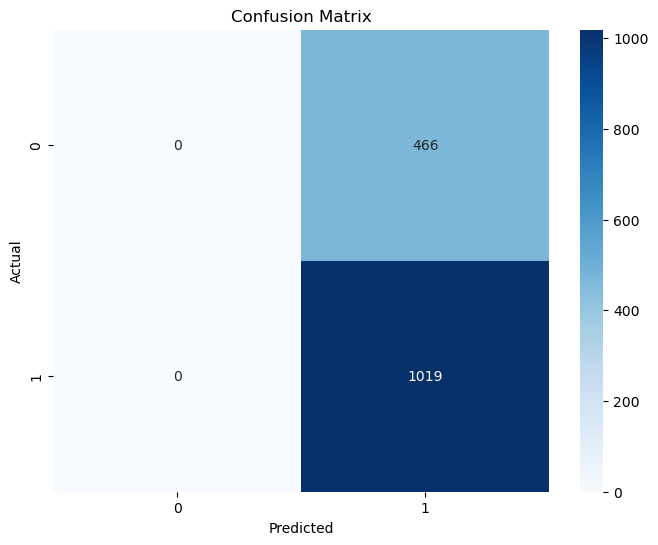

In [42]:
cm= confusion_matrix(y_test,y_pred)

# Define labels for confusion matrix
labels = ['0' , '1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# ROC-AUC score
from sklearn.metrics import roc_auc_score
y_score = LR.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.4761200284719092


#### GaussianNB

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_pred_train_gnb = gnb.predict(X_train)


In [45]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       466
           1       0.69      1.00      0.81      1019

    accuracy                           0.69      1485
   macro avg       0.34      0.50      0.41      1485
weighted avg       0.47      0.69      0.56      1485



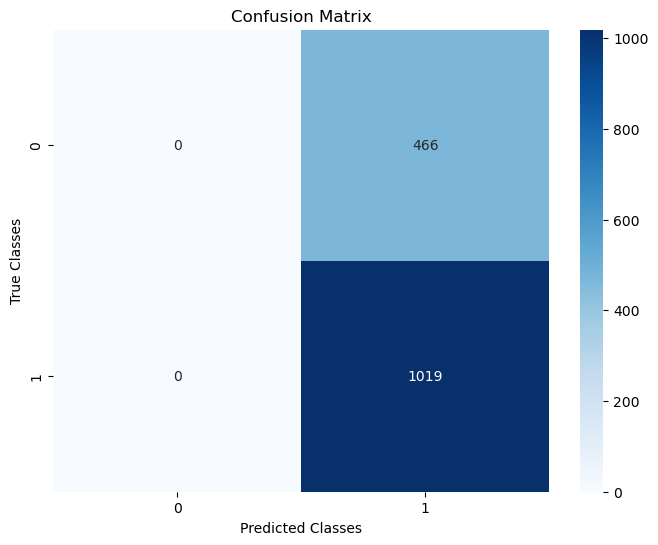

In [46]:
cm_gnb= confusion_matrix(y_test,y_pred_gnb)

# Define labels for confusion matrix
labels = ['0' , '1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

The above Naive-Bayes model gave accuracy score of 69% which seems to be best out of all above tried models.

#### XGBClassifier

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop(['Status', 'Created'], axis=1)
y = data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [48]:
models = {
      'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [49]:
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))



--- XGBoost ---
              precision    recall  f1-score   support

           0       0.31      0.16      0.21       466
           1       0.69      0.84      0.75      1019

    accuracy                           0.63      1485
   macro avg       0.50      0.50      0.48      1485
weighted avg       0.57      0.63      0.58      1485

Accuracy: 0.6255892255892256


### Challenges Faced

---> Missing values in important fields like Product_ID, Source, Sales_Agent.

---> Some categorical values had to be encoded without domain knowledge.

---> Manual categorization of leads earlier was subjective and inconsistent.

---> Balance between High and Low Potential classes was not checked for imbalance.



### Conclusion

---> Exploratory analysis showed patterns across      sources, agents, and delivery modes.

---> A Random Forest and Naive Bayees model was successfully trained with decent classification results.

---> With proper deployment and continuous retraining, FicZon can improve lead conversion and optimize sales efforts.

---> Next steps can include hyperparameter tuning, feature importance analysis, and incorporating time-series trends.